In [109]:
#import liabraries

import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',100)
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [110]:
#read&load dataset into pandas dataframe

df = pd.read_csv('C:/Users/kyu11/Documents/GitHub/python/csv/nutrition.csv')

In [111]:
df.sort_values(by=['calories'])

,Unnamed: 0,name,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,niacin,pantothenic_acid,riboflavin,thiamin,vitamin_a,vitamin_a_rae,carotene_alpha,carotene_beta,cryptoxanthin_beta,lutein_zeaxanthin,lucopene,vitamin_b12,vitamin_b6,vitamin_c,vitamin_d,vitamin_e,tocopherol_alpha,vitamin_k,calcium,copper,irom,magnesium,manganese,phosphorous,potassium,selenium,zink,protein,alanine,arginine,aspartic_acid,cystine,glutamic_acid,glycine,histidine,hydroxyproline,isoleucine,leucine,lysine,methionine,phenylalanine,proline,serine,threonine,tryptophan,tyrosine,valine,carbohydrate,fiber,sugars,fructose,galactose,glucose,lactose,maltose,sucrose,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
2064,2064,"Beverages, POLAND SPRING, bottled, water",100 g,0,0g,NaN,0,1.00 mg,0,0.00 mcg,0.00 mcg,0.000 mg,0.000 mg,0.000 mg,0.000 mg,0.00 IU,0.00 mcg,0,0,0,0,0,0.00 mcg,0.000 mg,0.0 mg,0,0,0,0,1.00 mg,0.000 mg,0.01 mg,1.00 mg,0.000 mg,0.00 mg,0.00 mg,0.0 mcg,0.00 mg,0.00 g,0.000 g,0.000 g,0.000 g,0.000 g,0.000 g,0.000 g,0.000 g,0,0.000 g,0.000 g,0.000 g,0.000 g,0.000 g,0.000 g,0.000 g,0.000 g,0.000 g,0.000 g,0.000 g,0.00 g,0.0 g,0,0,0,0,0,0,0,0.00 g,0.000 g,0.000 g,0.000 g,0.00 mg,0,0.00 g,0,0,100.00 g
3460,3460,"Beverages, EVIAN, non-carbonated, bottled, water",100 g,0,0g,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00 g,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00 g,0,0,0,0,0,0,0,0,0.00 g,0,0,0,0,0,0.05 g,0,0,99.97 g
1311,1311,"Beverages, cola, ZEVIA",100 g,0,0g,NaN,0,6.00 mg,0.0 mg,0.00 mcg,0.00 mcg,0.000 mg,0,0.000 mg,0.000 mg,0.00 IU,0.00 mcg,0.00 mcg,0.00 mcg,0.00 mcg,0.00 mcg,0,0.00 mcg,0.000 mg,0.0 mg,0.00 IU,0.00 mg,0.00 mg,0.0 mcg,0.00 mg,0.000 mg,0.00 mg,0.00 mg,0,0.00 mg,0.00 mg,0.0 mcg,0.00 mg,0.00 g,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.13 g,0.0 g,0.00 g,0,0,0,0,0,0,0.00 g,0.000 g,0.000 g,0.000 g,0.00 mg,0.0 g,0.00 g,13.00 mg,0.00 mg,98.36 g
4576,4576,"Beverages, unsweetened, ready to drink, green,...",100 g,0,0g,NaN,0,7.00 mg,0.0 mg,0.00 mcg,0.00 mcg,0.000 mg,0,0.000 mg,0.000 mg,0.00 IU,0.00 mcg,0.00 mcg,0.00 mcg,0.00 mcg,0.00 mcg,0,0.00 mcg,0.000 mg,0.0 mg,0.00 IU,0.00 mg,0.00 mg,0.0 mcg,1.00 mg,0.005 mg,0.00 mg,0.00 mg,0,26.00 mg,19.00 mg,0.0 mcg,0.01 mg,0.00 g,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00 g,0.0 g,0.00 g,0,0,0,0,0,0,0.00 g,0.000 g,0.000 g,0.000 g,0.00 mg,0.0 g,0.12 g,12.00 mg,0.00 mg,99.88 g
7721,7721,"Beverages,,Gerolsteiner naturally sparkling mi...",100 g,0,0g,NaN,0,13.00 mg,0.0 mg,0.00 mcg,0.00 mcg,0.000 mg,0,0.000 mg,0.000 mg,0.00 IU,0.00 mcg,0.00 mcg,0.00 mcg,0.00 mcg,0.00 mcg,0,0.00 mcg,0.000 mg,0.0 mg,0.00 IU,0.00 mg,0.00 mg,0.0 mcg,33.00 mg,0.000 mg,0.00 mg,11.00 mg,0,0.00 mg,2.00 mg,0.0 mcg,0.00 mg,0.00 g,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00 g,0.0 g,0.00 g,0,0,0,0,0,0,0.00 g,0.000 g,0.000 g,0.000 g,0.00 mg,0.0 g,0.05 g,0.00 mg,0.00 mg,99.95 g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,430,"Fat, beef tallow",100 g,902,100g,50g,109mg,0.00 mg,79.8 mg,0.00 mcg,0.00 mcg,0.000 mg,0.000 mg,0.000 mg,0.000 mg,0.00 IU,0.00 mcg,0.00 mcg,0.00 mcg,0.00 mcg,0.00 mcg,0,0.00 mcg,0.000 mg,0.0 mg,28.00 IU,2.70 mg,2.70 mg,0.0 mcg,0.00 mg,0.000 mg,0.00 mg,0.00 mg,0,0.00 mg,0.00 mg,0.2 mcg,0.00 mg,0.00 g,0.000 g,0.000 g,0.000 g,0.000 g,0.000 g,0.000 g,0.000 g,0,0.000 g,0.000 g,0.000 g,0.000 g,0.000 g,0.000 g,0.000 g,0.000 g,0.000 g,0.000 g,0.000 g,0.00 g,0.0 g,0.00 g,0,0,0,0,0,0,100.00 g,49.800 g,41.800 g,4.000 g,109.00 mg,0.0 g,0.00 g,0.00 mg,0.00 mg,0.00 g
355,355,"Fish oil, sardine",100 g,902,100g,30g,710mg,0.00 mg,0,0.00 mcg,0.00 mcg,0.000 mg,0.000 mg,0.000 mg,0.000 mg,0.00 IU,0.00 mcg,0,0,0,0,0

In [112]:
#Make total_fat by Ascending order -> String to float(소수점)
#df['total_fat_new'] = df['total_fat'].str[:-1].astype(float)
#df.sort_values(by=['total_fat_new'], ascending=False)

In [113]:
#printing the columns

for i in df.columns:
    print(i, end=',')

Unnamed: 0,name,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,niacin,pantothenic_acid,riboflavin,thiamin,vitamin_a,vitamin_a_rae,carotene_alpha,carotene_beta,cryptoxanthin_beta,lutein_zeaxanthin,lucopene,vitamin_b12,vitamin_b6,vitamin_c,vitamin_d,vitamin_e,tocopherol_alpha,vitamin_k,calcium,copper,irom,magnesium,manganese,phosphorous,potassium,selenium,zink,protein,alanine,arginine,aspartic_acid,cystine,glutamic_acid,glycine,histidine,hydroxyproline,isoleucine,leucine,lysine,methionine,phenylalanine,proline,serine,threonine,tryptophan,tyrosine,valine,carbohydrate,fiber,sugars,fructose,galactose,glucose,lactose,maltose,sucrose,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water,

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8789 entries, 0 to 8788
Data columns (total 77 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Unnamed: 0                   8789 non-null   int64 
 1   name                         8789 non-null   object
 2   serving_size                 8789 non-null   object
 3   calories                     8789 non-null   int64 
 4   total_fat                    8789 non-null   object
 5   saturated_fat                7199 non-null   object
 6   cholesterol                  8789 non-null   object
 7   sodium                       8789 non-null   object
 8   choline                      8789 non-null   object
 9   folate                       8789 non-null   object
 10  folic_acid                   8789 non-null   object
 11  niacin                       8789 non-null   object
 12  pantothenic_acid             8789 non-null   object
 13  riboflavin                   8789

In [115]:
df.columns

Index(['Unnamed: 0', 'name', 'serving_size', 'calories', 'total_fat',
       'saturated_fat', 'cholesterol', 'sodium', 'choline', 'folate',
       'folic_acid', 'niacin', 'pantothenic_acid', 'riboflavin', 'thiamin',
       'vitamin_a', 'vitamin_a_rae', 'carotene_alpha', 'carotene_beta',
       'cryptoxanthin_beta', 'lutein_zeaxanthin', 'lucopene', 'vitamin_b12',
       'vitamin_b6', 'vitamin_c', 'vitamin_d', 'vitamin_e', 'tocopherol_alpha',
       'vitamin_k', 'calcium', 'copper', 'irom', 'magnesium', 'manganese',
       'phosphorous', 'potassium', 'selenium', 'zink', 'protein', 'alanine',
       'arginine', 'aspartic_acid', 'cystine', 'glutamic_acid', 'glycine',
       'histidine', 'hydroxyproline', 'isoleucine', 'leucine', 'lysine',
       'methionine', 'phenylalanine', 'proline', 'serine', 'threonine',
       'tryptophan', 'tyrosine', 'valine', 'carbohydrate', 'fiber', 'sugars',
       'fructose', 'galactose', 'glucose', 'lactose', 'maltose', 'sucrose',
       'fat', 'saturated_fatt

In [116]:
#drop the columns 
#df.drop(columns = ['col1','col2','col3'], inplace = True)

df = df[['name', 'serving_size','calories','protein','carbohydrate', 'sugars',
       'fat','total_fat','cholesterol','sodium','fiber']].copy()
df


,name,serving_size,calories,protein,carbohydrate,sugars,fat,total_fat,cholesterol,sodium,fiber
0,Cornstarch,100 g,381,0.26 g,91.27 g,0.00 g,0.05 g,0.1g,0,9.00 mg,0.9 g
1,"Nuts, pecans",100 g,691,9.17 g,13.86 g,3.97 g,71.97 g,72g,0,0.00 mg,9.6 g
2,"Eggplant, raw",100 g,25,0.98 g,5.88 g,3.53 g,0.18 g,0.2g,0,2.00 mg,3.0 g
3,"Teff, uncooked",100 g,367,13.30 g,73.13 g,1.84 g,2.38 g,2.4g,0,12.00 mg,8.0 g
4,"Sherbet, orange",100 g,144,1.10 g,30.40 g,24.32 g,2.00 g,2g,1mg,46.00 mg,1.3 g
...,...,...,...,...,...,...,...,...,...,...,...
8784,"Beef, raw, all grades, trimmed to 0"" fat, sepa...",100 g,125,23.45 g,0.00 g,0.00 g,3.50 g,3.5g,62mg,54.00 mg,0.0 g
8785,"Lamb, cooked, separable lean only, composite o...",100 g,206,29.59 g,0.00 g,0,8.86 g,8.9g,109mg,50.00 mg,0.0 g
8786,"Lamb, raw, separable lean and fat, composite o...",100 g,277,16.74 g,0.00 g,0,22.74 g,23g,78mg,39.00 mg,0.0 g
8787,"Beef, raw, all grades, trimmed to 0"" fat, sepa...",100 g,121,23.37 g,0.00 g,0.00 g,3.04 g,3g,60mg,53.00 mg,0.0 g


In [117]:
# split the columns
#df[["Food","Type"]] = df["name"].str.split(",", n =1, expand=True,)

# drop the original Name columns
#df = df.drop("name",axis=1)

# reindexing the columns 
#df = df.reindex(columns=['Food', 'Type'] + list(df.columns[:-2]))

In [118]:
#check the null value

df.columns[df.isna().any()]

Index([], dtype='object')

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8789 entries, 0 to 8788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          8789 non-null   object
 1   serving_size  8789 non-null   object
 2   calories      8789 non-null   int64 
 3   protein       8789 non-null   object
 4   carbohydrate  8789 non-null   object
 5   sugars        8789 non-null   object
 6   fat           8789 non-null   object
 7   total_fat     8789 non-null   object
 8   cholesterol   8789 non-null   object
 9   sodium        8789 non-null   object
 10  fiber         8789 non-null   object
dtypes: int64(1), object(10)
memory usage: 755.4+ KB


In [120]:
# #Example of remove Nulls 

# #df = pd.DataFrame({"name": ['Alfred', 'Batman', 'Catwoman'],
#                  "toy": [np.nan, 'Batmobile', 'Bullwhip'],
#                 "born": [pd.NaT, pd.Timestamp("1940-04-25"),
#                             pd.NaT]})
# df
# df.dropna(subset=['toy','born'])
# #replace nulls to o
# df.fillna(0)

In [121]:
df.tail(1)

,name,serving_size,calories,protein,carbohydrate,sugars,fat,total_fat,cholesterol,sodium,fiber
8788,"Beef, raw, all grades, trimmed to 0"" fat, sepa...",100 g,121,23.37 g,0.00 g,0.00 g,3.04 g,3g,60mg,53.00 mg,0.0 g


In [122]:
df['name'] = df['name'].str.replace(',', '\n')
df

,name,serving_size,calories,protein,carbohydrate,sugars,fat,total_fat,cholesterol,sodium,fiber
0,Cornstarch,100 g,381,0.26 g,91.27 g,0.00 g,0.05 g,0.1g,0,9.00 mg,0.9 g
1,Nuts\n pecans,100 g,691,9.17 g,13.86 g,3.97 g,71.97 g,72g,0,0.00 mg,9.6 g
2,Eggplant\n raw,100 g,25,0.98 g,5.88 g,3.53 g,0.18 g,0.2g,0,2.00 mg,3.0 g
3,Teff\n uncooked,100 g,367,13.30 g,73.13 g,1.84 g,2.38 g,2.4g,0,12.00 mg,8.0 g
4,Sherbet\n orange,100 g,144,1.10 g,30.40 g,24.32 g,2.00 g,2g,1mg,46.00 mg,1.3 g
...,...,...,...,...,...,...,...,...,...,...,...
8784,"Beef\n raw\n all grades\n trimmed to 0"" fat\n ...",100 g,125,23.45 g,0.00 g,0.00 g,3.50 g,3.5g,62mg,54.00 mg,0.0 g
8785,Lamb\n cooked\n separable lean only\n composit...,100 g,206,29.59 g,0.00 g,0,8.86 g,8.9g,109mg,50.00 mg,0.0 g
8786,Lamb\n raw\n separable lean and fat\n composit...,100 g,277,16.74 g,0.00 g,0,22.74 g,23g,78mg,39.00 mg,0.0 g
8787,"Beef\n raw\n all grades\n trimmed to 0"" fat\n ...",100 g,121,23.37 g,0.00 g,0.00 g,3.04 g,3g,60mg,53.00 mg,0.0 g


In [123]:
df.rename(columns={'name':'Food',"serving_size":"Svg_size_g",
           'total_fat':'Ttl_fat_g','cholesterol':'Chol_mg',
           "sodium":"Na_mg",'protein':'Protein_g','carbohydrate':'Carbs_g',
           'fiber':'Fiber_g','sugars':'Sugars_g','fat':'Fat_g'},inplace=True)
df

,Food,Svg_size_g,calories,Protein_g,Carbs_g,Sugars_g,Fat_g,Ttl_fat_g,Chol_mg,Na_mg,Fiber_g
0,Cornstarch,100 g,381,0.26 g,91.27 g,0.00 g,0.05 g,0.1g,0,9.00 mg,0.9 g
1,Nuts\n pecans,100 g,691,9.17 g,13.86 g,3.97 g,71.97 g,72g,0,0.00 mg,9.6 g
2,Eggplant\n raw,100 g,25,0.98 g,5.88 g,3.53 g,0.18 g,0.2g,0,2.00 mg,3.0 g
3,Teff\n uncooked,100 g,367,13.30 g,73.13 g,1.84 g,2.38 g,2.4g,0,12.00 mg,8.0 g
4,Sherbet\n orange,100 g,144,1.10 g,30.40 g,24.32 g,2.00 g,2g,1mg,46.00 mg,1.3 g
...,...,...,...,...,...,...,...,...,...,...,...
8784,"Beef\n raw\n all grades\n trimmed to 0"" fat\n ...",100 g,125,23.45 g,0.00 g,0.00 g,3.50 g,3.5g,62mg,54.00 mg,0.0 g
8785,Lamb\n cooked\n separable lean only\n composit...,100 g,206,29.59 g,0.00 g,0,8.86 g,8.9g,109mg,50.00 mg,0.0 g
8786,Lamb\n raw\n separable lean and fat\n composit...,100 g,277,16.74 g,0.00 g,0,22.74 g,23g,78mg,39.00 mg,0.0 g
8787,"Beef\n raw\n all grades\n trimmed to 0"" fat\n ...",100 g,121,23.37 g,0.00 g,0.00 g,3.04 g,3g,60mg,53.00 mg,0.0 g


In [124]:
df.dtypes

Food          object
Svg_size_g    object
calories       int64
Protein_g     object
Carbs_g       object
Sugars_g      object
Fat_g         object
Ttl_fat_g     object
Chol_mg       object
Na_mg         object
Fiber_g       object
dtype: object

In [128]:
#dealing with miniscule amount

cols_to_clean = list(df.columns[2:])
df[cols_to_clean] = df[cols_to_clean].replace({"mg":"",'g':'',"mc":"","IU":""}, regex=True).astype(float)


In [129]:
df.describe()

,calories,Protein_g,Carbs_g,Sugars_g,Fat_g,Ttl_fat_g,Chol_mg,Na_mg,Fiber_g
count,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000
mean,226.283878,11.345616,22.121915,6.756293,10.550794,10.556855,38.723063,306.353851,2.040073
std,169.862001,10.530602,27.266261,13.718890,15.814870,15.818247,117.358944,939.220468,4.269181
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91.000000,2.380000,0.050000,0.000000,0.950000,1.000000,0.000000,36.000000,0.000000
50%,191.000000,8.020000,9.340000,0.490000,5.130000,5.100000,2.000000,84.000000,0.400000
75%,337.000000,19.880000,34.910000,6.050000,13.720000,14.000000,65.000000,396.000000,2.400000
max,902.000000,88.320000,100.000000,99.800000,100.000000,100.000000,3100.000000,38758.000000,79.000000


In [130]:
#check the null
df.columns[df.isna().any()]

Index([], dtype='object')

In [131]:
#duplicated: return series with true or false which rows are duplicated
#subset: Select rows based on coloumns value 

df.duplicated(subset=['Food']).sum()

0

In [ ]:
df.head()

,Food,Svg_size_g,calories,Protein_g,Carbs_g,Sugars_g,Fat_g,Ttl_fat_g,Chol_mg,Na_mg,Fiber_g,Category
0,Cornstarch,100 g,,0.26,91.27,0.00,0.05,0.1,0.0,9.0,0.9,
1,Nuts\n pecans,100 g,,9.17,13.86,3.97,71.97,72.0,0.0,0.0,9.6,
2,Eggplant\n raw,100 g,,0.98,5.88,3.53,0.18,0.2,0.0,2.0,3.0,
3,Teff\n uncooked,100 g,,13.30,73.13,1.84,2.38,2.4,0.0,12.0,8.0,
4,Sherbet\n orange,100 g,,1.10,30.40,24.32,2.00,2.0,1.0,46.0,1.3,


In [132]:
#create dictionary of food categories and corresponding keywords

categories = {
    'Vegetables': ['broccoli', 'spinach', 'kale', 'carrots', 'tomatoes', 'bell peppers', 'cucumbers', 'zucchini', 'eggplant', 'cauliflower', 'cabbage', 'onions', 'sweet potatoes', 'green beans', 'peas', 'asparagus', 'Brussels sprouts', 'artichokes', 'beets', 'radishes'],
    'Meat': ['beef', 'pork', 'lamb', 'goat', 'chicken', 'turkey', 'duck','goose', 'rabbit', 'bison'],
    'Poultry': ['chicken', 'turkey', 'duck', 'quail', 'goose', 'pigeon', 'pheasant'],
    'Fat food': ['butter', 'cheese', 'lard', 'margarine', 'shortening'],
    'Dairy Products': ['milk', 'yogurt', 'cheese', 'cream', 'butter', 'ice cream', 'sour cream', 'cottage cheese'],
    'Drinks': ['water', 'coffee', 'tea', 'soda', 'juice', 'beer', 'wine', 'liquor'],
    'Dessert': ['cake', 'pie', 'chocolate', 'candy', 'cookies', 'ice cream'],
    'Seeds and Nuts': ['almonds', 'cashews', 'peanuts', 'pistachios', 'walnuts', 'sesame seeds', 'flax seeds', 'chia seeds']
}


In [133]:
#create dictionary of food categories
df['Category'] = ''

In [136]:
#If there is something I don't understand about the code,  try to break out
categories.items()

dict_items([('Vegetables', ['broccoli', 'spinach', 'kale', 'carrots', 'tomatoes', 'bell peppers', 'cucumbers', 'zucchini', 'eggplant', 'cauliflower', 'cabbage', 'onions', 'sweet potatoes', 'green beans', 'peas', 'asparagus', 'Brussels sprouts', 'artichokes', 'beets', 'radishes']), ('Meat', ['beef', 'pork', 'lamb', 'goat', 'chicken', 'turkey', 'duck', 'goose', 'rabbit', 'bison']), ('Poultry', ['chicken', 'turkey', 'duck', 'quail', 'goose', 'pigeon', 'pheasant']), ('Fat food', ['butter', 'cheese', 'lard', 'margarine', 'shortening']), ('Dairy Products', ['milk', 'yogurt', 'cheese', 'cream', 'butter', 'ice cream', 'sour cream', 'cottage cheese']), ('Drinks', ['water', 'coffee', 'tea', 'soda', 'juice', 'beer', 'wine', 'liquor']), ('Dessert', ['cake', 'pie', 'chocolate', 'candy', 'cookies', 'ice cream']), ('Seeds and Nuts', ['almonds', 'cashews', 'peanuts', 'pistachios', 'walnuts', 'sesame seeds', 'flax seeds', 'chia seeds'])])

In [139]:
'|'.join(keywords)

'almonds|cashews|peanuts|pistachios|walnuts|sesame seeds|flax seeds|chia seeds'

In [142]:
df['Food'].str.contains('Cornstarch', case=False)

0        True
1       False
2       False
3       False
4       False
        ...  
8784    False
8785    False
8786    False
8787    False
8788    False
Name: Food, Length: 8789, dtype: bool

In [144]:
'|'.join(keywords)

'almonds|cashews|peanuts|pistachios|walnuts|sesame seeds|flax seeds|chia seeds'

In [145]:
df['Food'].str.contains('|'.join(keywords), case=False)

0       False
1       False
2       False
3       False
4       False
        ...  
8784    False
8785    False
8786    False
8787    False
8788    False
Name: Food, Length: 8789, dtype: bool

In [146]:
df.loc[df['Food'].str.contains('|'.join(keywords), case=False), 'Category'] = category

In [135]:
#fruits=['banana','cherry','mango']
#for x in fruit -> print every coloumn
# or for x in 'banana' -> print values in banana

#loc: allows the return of specified rows and/or columns from data frame
#Series.str.contains(case = True) * case:if true, case senstive

# iterate through each food category and assign the corresponding category to the food items
for category, keywords in categories.items():
    df.loc[df['Food'].str.contains('|'.join(keywords), case=False), 'Category'] = category

df


,Food,Svg_size_g,calories,Protein_g,Carbs_g,Sugars_g,Fat_g,Ttl_fat_g,Chol_mg,Na_mg,Fiber_g,Category
0,Cornstarch,100 g,381.0,0.26,91.27,0.00,0.05,0.1,0.0,9.0,0.9,
1,Nuts\n pecans,100 g,691.0,9.17,13.86,3.97,71.97,72.0,0.0,0.0,9.6,
2,Eggplant\n raw,100 g,25.0,0.98,5.88,3.53,0.18,0.2,0.0,2.0,3.0,Vegetables
3,Teff\n uncooked,100 g,367.0,13.30,73.13,1.84,2.38,2.4,0.0,12.0,8.0,
4,Sherbet\n orange,100 g,144.0,1.10,30.40,24.32,2.00,2.0,1.0,46.0,1.3,
...,...,...,...,...,...,...,...,...,...,...,...,...
8784,"Beef\n raw\n all grades\n trimmed to 0"" fat\n ...",100 g,125.0,23.45,0.00,0.00,3.50,3.5,62.0,54.0,0.0,Meat
8785,Lamb\n cooked\n separable lean only\n composit...,100 g,206.0,29.59,0.00,0.00,8.86,8.9,109.0,50.0,0.0,Meat
8786,Lamb\n raw\n separable lean and fat\n composit...,100 g,277.0,16.74,0.00,0.00,22.74,23.0,78.0,39.0,0.0,Meat
8787,"Beef\n raw\n all grades\n trimmed to 0"" fat\n ...",100 g,121.0,23.37,0.00,0.00,3.04,3.0,60.0,53.0,0.0,Meat


In [149]:
#delect the remaining rows which are not in the categories
#replace('value','to_replace',inplace=True)
#inplace = True ; modify datafram rather than creating a new one

df['Category'].replace('', np.nan, inplace = True)


In [160]:
#df.dropna(subset=['category]) ; define in which columns to look for missing values
#if there is one vlaue from column ,'category' is null then remove it 
#df.reset_index(drop=True, inplace= True); drop: to avoid the old index added as a column

df.dropna(subset=["Category"], inplace = True)
df.reset_index(drop=True, inplace= True)

In [161]:
df["Category"].value_counts()

Meat              1336
Drinks            1023
Dairy Products     774
Poultry            659
Dessert            659
Vegetables         254
Fat food            70
Seeds and Nuts      56
Name: Category, dtype: int64

In [166]:
df.head(10)

,Food,Svg_size_g,calories,Protein_g,Carbs_g,Sugars_g,Fat_g,Ttl_fat_g,Chol_mg,Na_mg,Fiber_g,Category
0,Eggplant\n raw,100 g,25.0,0.98,5.88,3.53,0.18,0.2,0.0,2.0,3.0,Vegetables
1,Cauliflower\n raw,100 g,25.0,1.92,4.97,1.91,0.28,0.3,0.0,30.0,2.0,Vegetables
2,Lamb\n raw\n ground,100 g,282.0,16.56,0.00,0.00,23.41,23.0,73.0,59.0,0.0,Meat
3,Cheese\n camembert,100 g,300.0,19.80,0.46,0.46,24.26,24.0,72.0,842.0,0.0,Dairy Products
4,Chicken\n boiled\n feet,100 g,215.0,19.40,0.20,0.00,14.60,15.0,84.0,67.0,0.0,Poultry
5,Quail\n raw\n meat only,100 g,134.0,21.76,0.00,0.00,4.53,4.5,70.0,51.0,0.0,Poultry
6,Pie\n lemon\n fried pies,100 g,316.0,3.00,42.60,0.00,16.10,16.0,0.0,374.0,2.6,Dessert
7,Salami\n turkey\n cooked,100 g,172.0,19.20,1.55,1.12,9.21,9.2,76.0,1107.0,0.1,Poultry
8,Cheese\n low fat\n cream,100 g,201.0,7.85,8.13,5.82,15.28,15.0,54.0,359.0,0.0,Dairy Products
9,Cookies\n Marie biscuit,100 g,406.0,7.05,70.54,21.16,10.58,11.0,0.0,370.0,3.5,Dessert


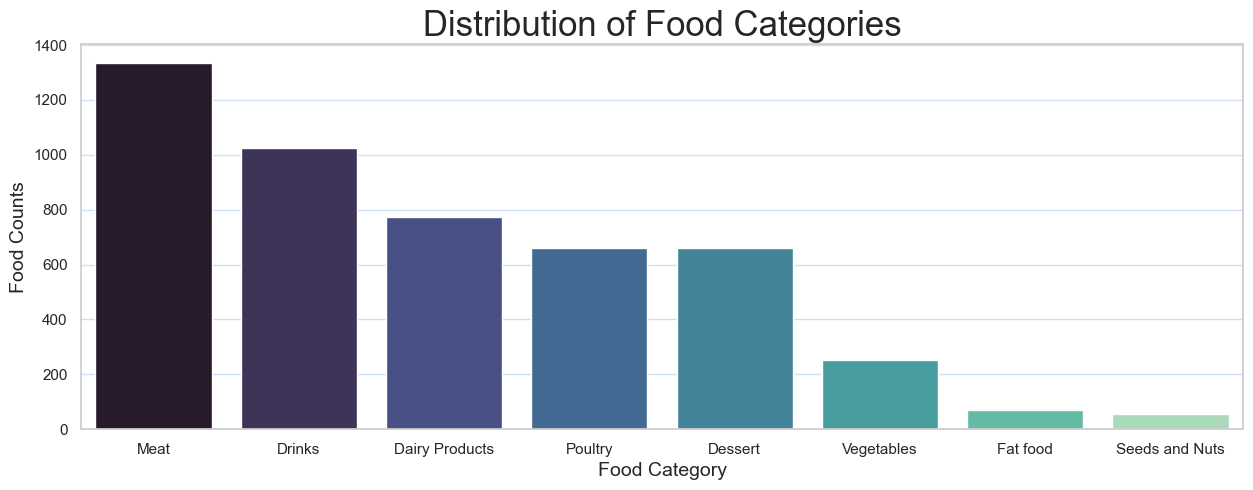

In [168]:
#data analysis and visualisation

fig, ax = plt.subplots(figsize = (15,5), dpi = 100)
sns.set(style="whitegrid")
Category_count = df['Category'].value_counts()
ax = sns.barplot(x=Category_count.index,y=Category_count.values ,palette='mako');

# set x & y label
ax.set_ylabel('Food Counts', fontsize = 14)
ax.set_xlabel("Food Category", fontsize = 14)

# grid color
ax.grid(color='#6495ed', linewidth=1, axis='y', alpha=.3)

# set title
ax.set_title("Distribution of Food Categories", fontsize = 25)

plt.show()

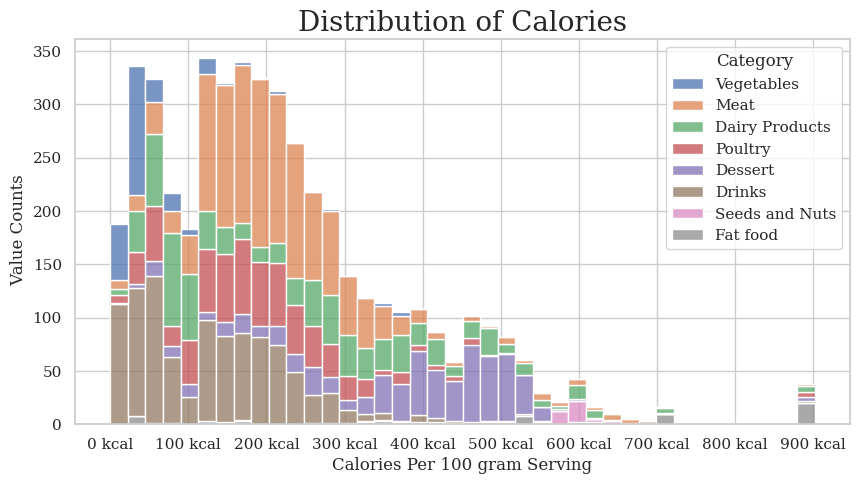

In [170]:
# create a new dataframe with only the necessary columns
Calories_df = df[['Category', 'calories']]

# create a histogram for each food category
plt.rc('font', family='serif', size=12)
fig, ax = plt.subplots(figsize = (10,5), dpi = 100)
ax = sns.histplot(data=df, x='calories', hue='Category', multiple='stack')

# set title & labels
ax.set_title("Distribution of Calories", fontsize = 20)
ax.set_xlabel("Calories Per 100 gram Serving")
ax.set_ylabel(" Value Counts")
ax.set_xticks(np.arange(0,1000,100))

# set x-tick labels to show "kcal"
x_ticks = plt.xticks()[0]
plt.xticks(x_ticks, [f"{int(x)} kcal" for x in x_ticks])

plt.show()

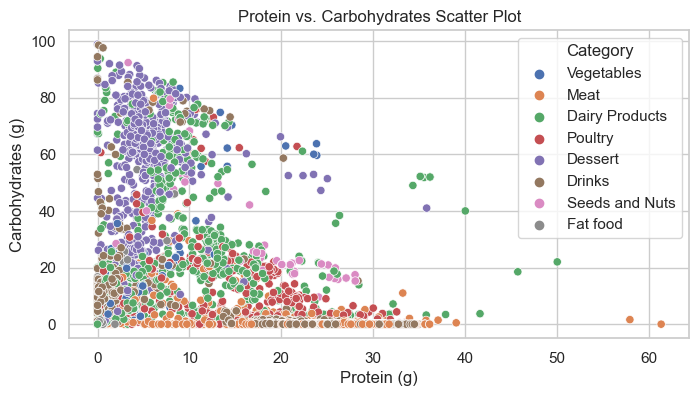

In [172]:
# create a scatter plot of protein vs. carbohydrates
plt.rc('font', family='sans-serif', size=12)
plt.subplots(figsize = (8,4), dpi = 100)
sns.scatterplot(x='Protein_g',hue = 'Category', y='Carbs_g', data=df)

# set the title and x and y axis labels

plt.title('Protein vs. Carbohydrates Scatter Plot')
plt.xlabel('Protein (g)')
plt.ylabel('Carbohydrates (g)')

#

# show the plot
plt.show()

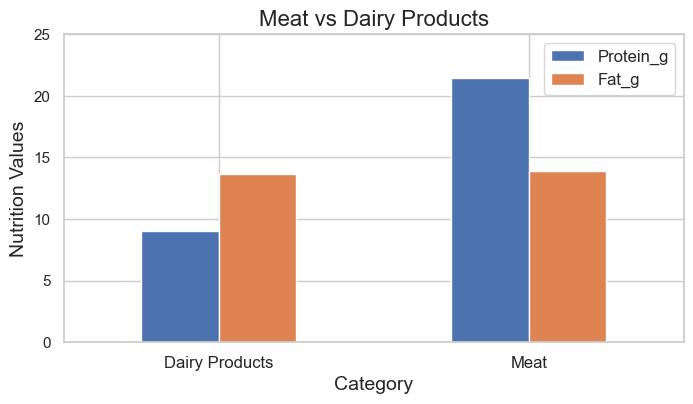

In [174]:
# filter the dataframe for Meat and Vegetables categories
meat_vegetables_df = df[df["Category"].isin(["Dairy Products", "Meat"])]

# group the filtered dataframe by Category and calculate mean values of calories, protein, and fat
grouped_df = meat_vegetables_df.groupby("Category")[["Protein_g", "Fat_g"]].mean()

grouped_df.plot(kind="bar", figsize=(8, 4))
plt.title("Meat vs Dairy Products", fontsize=16)
plt.yticks(np.arange(0,30,5))
plt.ylabel("Nutrition Values", fontsize=14)
plt.xlabel("Category", fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.legend(fontsize=12)
plt.show()

In [175]:
df.columns

Index(['Food', 'Svg_size_g', 'calories', 'Protein_g', 'Carbs_g', 'Sugars_g',
       'Fat_g', 'Ttl_fat_g', 'Chol_mg', 'Na_mg', 'Fiber_g', 'Category'],
      dtype='object')

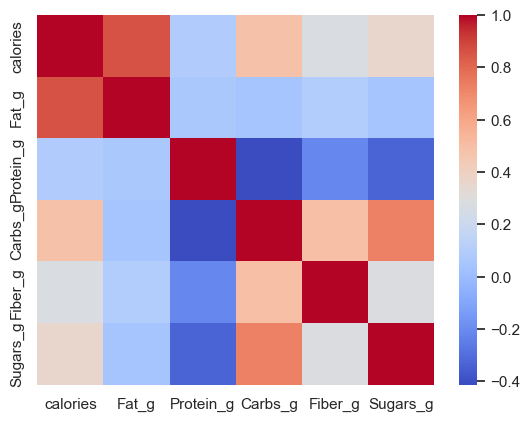

In [176]:
# create a correlation matrix of the nutrients
corr_matrix = df[['calories', 'Fat_g', 'Protein_g', 'Carbs_g', 'Fiber_g', 'Sugars_g']].corr()

# plot the correlation matrix as a heat map using seaborn
sns.heatmap(corr_matrix, cmap='coolwarm')

plt.show()

In [ ]:
# The dark blue color in the correlation matrix indicates a high positive correlation between protein and carbs, 
#meaning that as the protein intake increases, the carb intake also increase. 
#This could be due to the fact that many high-protein foods such as meat, fish, 
#and poultry also contain significant amounts of carbohydrates.

# Similarly, there is a positive correlation between protein and fat, 
#which could be due to the fact that many high-protein foods also contain significant amounts of fat, 
#such as nuts, seeds, and fatty meats.

# Finally, there is a positive correlation between fat and carbs, 
#which could be due to the fact that many high-fat foods such as dairy products and nuts also contain significant amounts of carbohydrates.

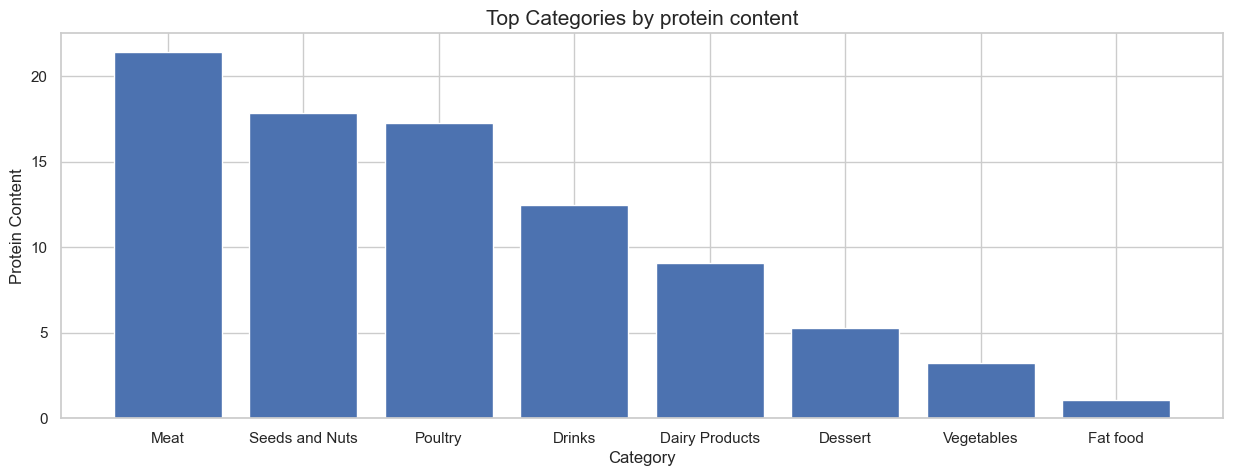

In [178]:
#What are the top categories from high to low protein?

grouped_by = df.groupby("Category")["Protein_g"].mean()

sorted_series = grouped_by.sort_values(ascending=False)
plt.subplots(figsize = (15,5), dpi = 100)
plt.bar(sorted_series.index,sorted_series.values,)
plt.xlabel("Category")
plt.ylabel("Protein Content")
plt.title("Top Categories by protein content", size=15)

plt.show()

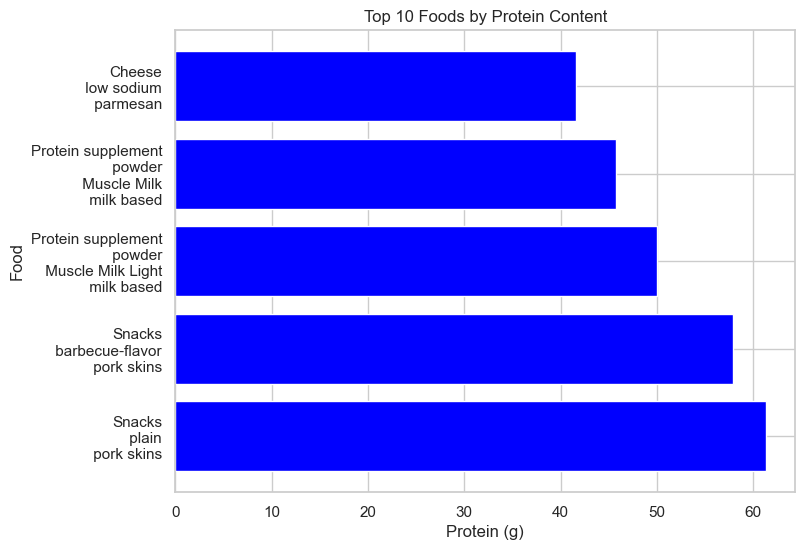

In [179]:
#What are the top 5 food items with the highest protein content?

high_protein_df = df[df["Protein_g"] > 20]

top_5 = high_protein_df.sort_values("Protein_g",ascending=False).head(5)

fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(top_5['Food'], top_5['Protein_g'], color='blue')

# set the axis labels and title
plt.xlabel("Protein (g)")
plt.ylabel("Food")
plt.title("Top 10 Foods by Protein Content")

plt.show()

In [180]:
#Which food categories are the highest sources of zinc, iron, and magnesium?

minerals_df = df[["Category","Zn_mg","Mg_mg","P_mg","Fe_mg"]]

grouped_df = minerals_df.groupby("Category").mean()

grouped_df.plot(kind="bar", figsize=(8,4))
plt.xticks(rotation=45)

plt.show()

KeyError: "['Zn_mg', 'Mg_mg', 'P_mg', 'Fe_mg'] not in index"

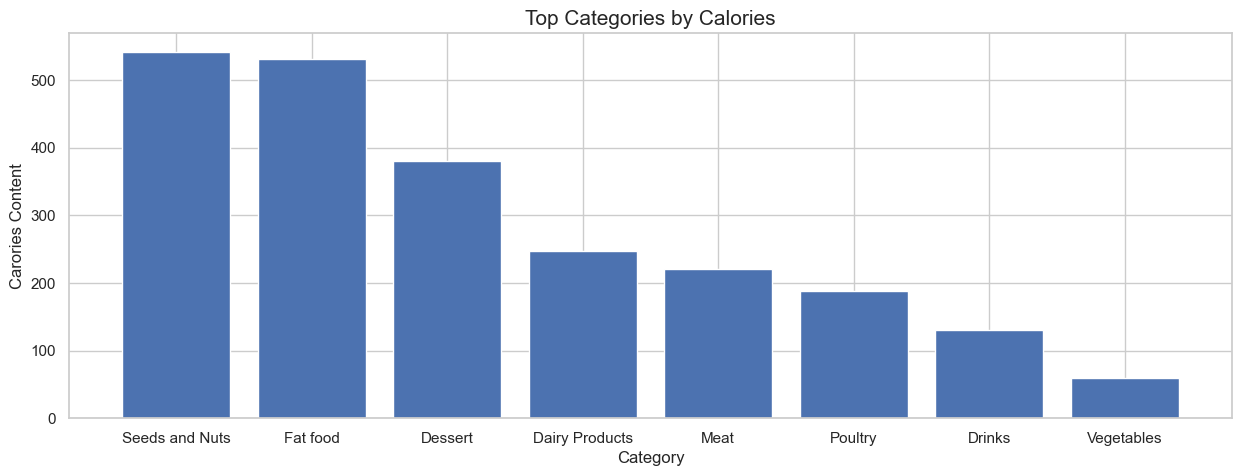

In [182]:
#what are the top categories from high to low Calories?

grouped_by = df.groupby("Category")["calories"].mean()

sorted_series = grouped_by.sort_values(ascending=False)
plt.subplots(figsize = (15,5), dpi = 100)
plt.bar(sorted_series.index,sorted_series.values,)
plt.xlabel("Category")
plt.ylabel("Carories Content")
plt.title("Top Categories by Calories", size=15)

plt.show()

In [183]:
#Create a Dataframe Category with most fiber
#df.nlargest:return the first largest row ordered by columns in descending order 

top_fiber = df.groupby('Category')['Fiber_g'].mean().nlargest(10)

top_fiber_df = top_fiber.reset_index(name='Mean Fiber (g)').head(10)
top_fiber_df

,Category,Mean Fiber (g)
0,Seeds and Nuts,8.573214
1,Vegetables,2.880709
2,Dessert,2.502731
3,Dairy Products,1.291602
4,Fat food,0.458571
5,Poultry,0.433536
6,Drinks,0.336755
7,Meat,0.126347
